Download the dataset from [here](https://www.kaggle.com/bozungu/used-cars-listing-from-ebay/download).

In [1]:
import pandas as pd
import numpy as np

autos_new = pd.read_csv('Dataset/autos_new.csv')
autos_new.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775,2016-04-06


In [2]:
autos_new = autos_new.dropna()

In [3]:
autos_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235829 entries, 2 to 335110
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        235829 non-null  object
 1   name                235829 non-null  object
 2   dollar_price        235829 non-null  int64 
 3   vehicle_type        235829 non-null  object
 4   registration_year   235829 non-null  int64 
 5   gearbox             235829 non-null  object
 6   power_ps            235829 non-null  int64 
 7   model               235829 non-null  object
 8   kilometer           235829 non-null  int64 
 9   registration_month  235829 non-null  int64 
 10  fuel_type           235829 non-null  object
 11  brand               235829 non-null  object
 12  unrepaired_damage   235829 non-null  object
 13  ad_created          235829 non-null  object
 14  postal_code         235829 non-null  int64 
 15  last_seen_online    235829 non-null  object
dtypes:

In [4]:
vehicle_types = autos_new['vehicle_type'].unique()
vehicle_type_dict = dict(zip(vehicle_types,range(len(vehicle_types))))
vehicle_type_dict

{'small car': 0,
 'limousine': 1,
 'convertible': 2,
 'station wagon': 3,
 'bus': 4,
 'coupé': 5,
 'other': 6}

In [5]:
gearbox = autos_new['gearbox'].unique()
gearbox_dict = dict(zip(gearbox,range(len(gearbox))))
gearbox_dict

{'manuell': 0, 'automatik': 1}

In [6]:
fuel_types = autos_new['fuel_type'].unique()
fuel_types_dict = dict(zip(fuel_types,range(len(fuel_types))))
fuel_types_dict

{'gasoline': 0,
 'diesel': 1,
 'liquefied petroleum gas': 2,
 'other': 3,
 'compressed natural gas': 4}

In [7]:
unrepaired_damage = autos_new['unrepaired_damage'].unique()
unrepaired_damage_dict = dict(zip(unrepaired_damage,range(len(unrepaired_damage))))
unrepaired_damage_dict

{'nein': 0, 'ja': 1}

In [8]:
autos_new['vehicle_type'] = autos_new['vehicle_type'].map(vehicle_type_dict)
autos_new['gearbox'] = autos_new['gearbox'].map(gearbox_dict)
autos_new['fuel_type'] = autos_new['fuel_type'].map(fuel_types_dict)
autos_new['unrepaired_damage'] = autos_new['unrepaired_damage'].map(unrepaired_damage_dict)

In [9]:
autos_new['date_crawled'] = pd.to_datetime(autos_new['date_crawled'])
autos_new['ad_created'] = pd.to_datetime(autos_new['ad_created'])
autos_new['last_seen_online'] = pd.to_datetime(autos_new['last_seen_online'])

In [10]:
import datetime as dt

autos_new = autos_new[autos_new['ad_created'].dt.year == 2016]
autos_new

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,0,2001,0,75,golf,150000,6,0,volkswagen,0,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,0,2008,0,69,fabia,90000,7,1,skoda,0,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1,1995,0,102,3er,150000,10,0,bmw,1,2016-04-04,33775,2016-04-06
5,2016-04-01,Peugeot_206_CC_110_Platinum,2200,2,2004,0,109,2_reihe,150000,8,0,peugeot,0,2016-04-01,67112,2016-04-05
8,2016-03-26,Mazda_3_1.6_Sport,2000,1,2004,0,105,3_reihe,150000,12,0,mazda,0,2016-03-26,96224,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335104,2016-03-19,turbo_defekt,3200,1,2004,0,225,leon,150000,5,0,seat,1,2016-03-19,96465,2016-03-19
335105,2016-03-27,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,4,2000,0,0,zafira,150000,3,0,opel,0,2016-03-27,26624,2016-03-29
335107,2016-03-05,Smart_smart_leistungssteigerung_100ps,1199,2,2000,1,101,fortwo,125000,3,0,smart,0,2016-03-05,26135,2016-03-11
335108,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,4,1996,0,102,transporter,150000,3,1,volkswagen,0,2016-03-19,87439,2016-04-07


In [11]:
def getcol(colname):
    return autos_new[colname]

In [12]:
numcols = autos_new.select_dtypes(include=np.number).columns.tolist()

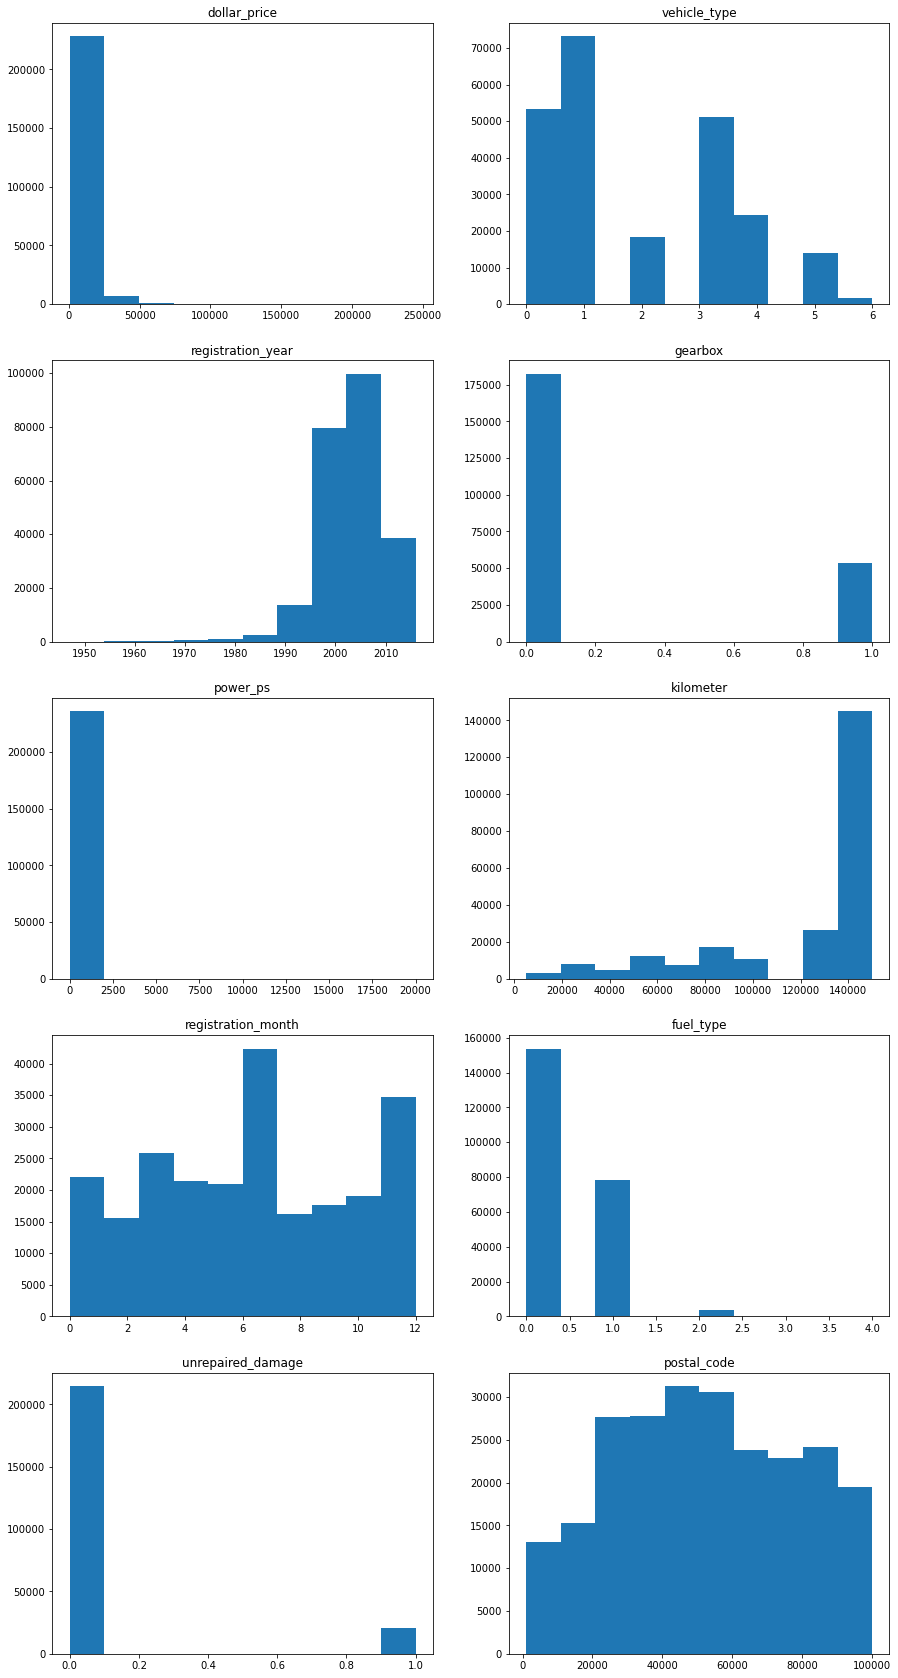

In [13]:
import pylab
%matplotlib inline

k=0
fig, ax = pylab.subplots(5, 2)
for i in range(5):
    for j in range(2):
        ax[i, j].hist(getcol(numcols[k]))
        ax[i,j].set_title(numcols[k])
        k+=1

fig.set_figheight(30)
fig.set_figwidth(15)